#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Reading Dataset

In [2]:
data=pd.read_csv("/content/indian_food.csv")

In [3]:
data.head(20)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


#Data Analysis

In [4]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [5]:
data.shape

(255, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
print("Total different dishes: {}".format(data.name.nunique()))

Total different dishes: 255


Each dish in this dataset is unique.

In [8]:
data['state'] = data['state'].apply(lambda x: x if x!="-1" else "Unknown State")
data['flavor_profile'] = data['flavor_profile'].apply(lambda x: x if x!="-1" else "Unknown Flavor")

In Data 'state' column and 'flavour_profile' column some cells contain -1 value, replacing those cell with 'unknown' label

#Retrieving the unique dishes count categorized by state,flavour_profile,course,diet

In [9]:
state_cnt = data['name'].groupby(data['state']).aggregate('count').sort_values()
flv_cnt = data['name'].groupby(data['flavor_profile']).aggregate('count').sort_values()
course_cnt = data['name'].groupby(data['course']).aggregate('count').sort_values()
diet_cnt = data['name'].groupby(data['diet']).aggregate('count').sort_values()

#Distributin of Dishes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


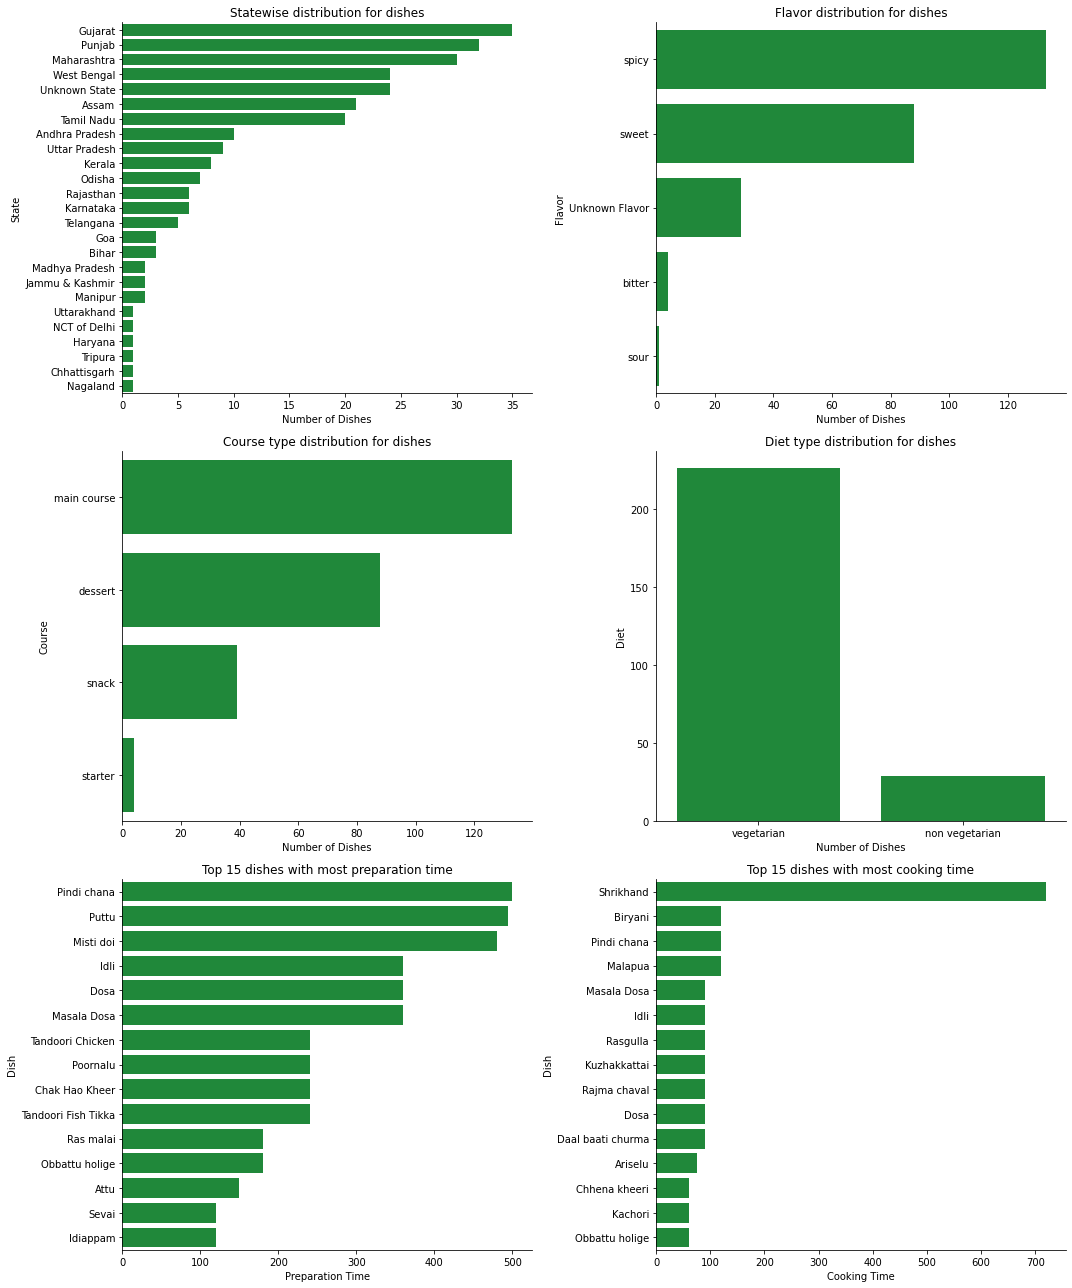

In [17]:
# Distribution of dishes
clr = '#0f9932'
fig = plt.figure(figsize=(15, 18))
fig.add_subplot(3,2,1)
sns.barplot(y=state_cnt.index[::-1], x=state_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('State')
plt.title("Statewise distribution for dishes")

fig.add_subplot(3,2,2)
sns.barplot(y=flv_cnt.index[::-1], x=flv_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Flavor')
plt.title("Flavor distribution for dishes")

fig.add_subplot(3,2,3)
sns.barplot(y=flv_cnt.index[::-1], x=flv_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Flavor')
plt.title("Flavor distribution for dishes")

fig.add_subplot(3,2,3)
sns.barplot(y=course_cnt.index[::-1], x=course_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Course')
plt.title("Course type distribution for dishes")

fig.add_subplot(3,2,4)
sns.barplot(x=diet_cnt.index[::-1], y=diet_cnt[::-1], color=clr)
sns.despine(right=True, top=True)
plt.xlabel('Number of Dishes')
plt.ylabel('Diet')
plt.title("Diet type distribution for dishes")

fig.add_subplot(3,2,5)
sns.barplot(y='name', x='prep_time', data=data[['name', 'prep_time']].sort_values(by='prep_time')[::-1][:15], color=clr)
sns.despine(right=True, top=True)
plt.ylabel('Dish')
plt.xlabel('Preparation Time')
plt.title("Top 15 dishes with most preparation time")


fig.add_subplot(3,2,6)
sns.barplot(y='name', x='cook_time', data=data[['name', 'cook_time']].sort_values(by='cook_time')[::-1][:15], color=clr)
sns.despine(right=True, top=True)
plt.ylabel('Dish')
plt.xlabel('Cooking Time')
plt.title("Top 15 dishes with most cooking time")

fig.tight_layout()
plt.show()

Finding unique ingredients

In [19]:
all_ingredients = ",".join(data.ingredients.tolist()).split(',')
all_ingredients_s = pd.Series(all_ingredients, name='All Ingredients')
total_unique_ingredients = list(set(all_ingredients))
print("Unique ingredients count : {}".format(len(total_unique_ingredients)))

Unique ingredients count : 426


#Plotting top 30 most used ingredients all over state wise

[]

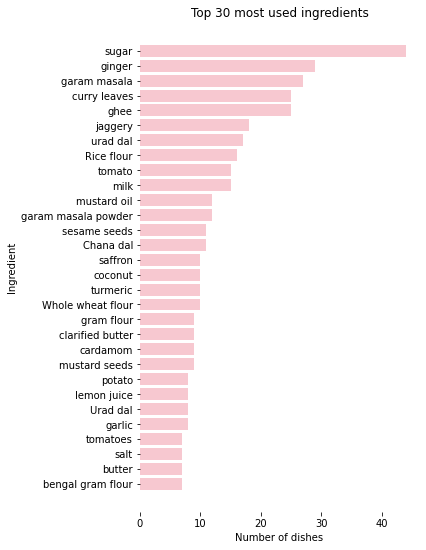

In [22]:
ing_c = all_ingredients_s.groupby(all_ingredients_s).aggregate('count').sort_values()
lbls = [i.strip() for i in ing_c.index]
fig = plt.figure(figsize=(5, 9))
sns.barplot(y=lbls[::-1][:30], x=ing_c.values[::-1][:30], color="pink")
sns.despine(left=True, bottom=True)
plt.title("Top 30 most used ingredients")
plt.xlabel("Number of dishes")
plt.ylabel("Ingredient")
plt.plot()

Distributions for Ingredients

In [23]:
def create_ingredient_series(list_of_ingredients):
  all_ingredients = ",".join(list_of_ingredients).split(',')
  all_ingredients = [i.lower().strip() for i in all_ingredients]
  #print(all_ingredients)
  all_ingredients_s = pd.Series(all_ingredients)
  ing_c = all_ingredients_s.groupby(all_ingredients_s).aggregate('count').sort_values(ascending=False)
  return ing_c

#Diet wise distribution of Ingredients


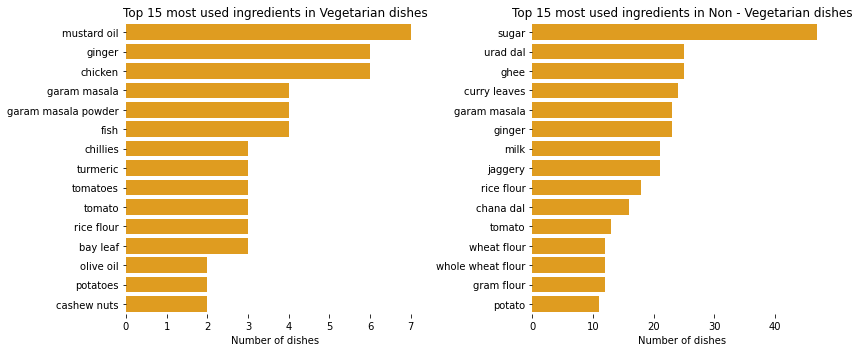

In [26]:
d_ing = []
for d in list(set(data['diet'])):
  diet_ing = create_ingredient_series(data[data['diet']==d]['ingredients'].tolist())
  d_ing.append(diet_ing)

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
sns.barplot(y=d_ing[1].index[:15], x=d_ing[1].values[:15], color="orange")
sns.despine(left=True, bottom=True)
plt.title("Top 15 most used ingredients in Vegetarian dishes")
plt.xlabel("Number of dishes")
fig.add_subplot(1, 2, 2)
sns.barplot(y=d_ing[0].index[:15], x=d_ing[0].values[:15], color="orange")
sns.despine(left=True, bottom=True)
plt.title("Top 15 most used ingredients in Non - Vegetarian dishes")
plt.xlabel("Number of dishes")
fig.tight_layout()
plt.show()

#Flavor wise distribution of Ingredients

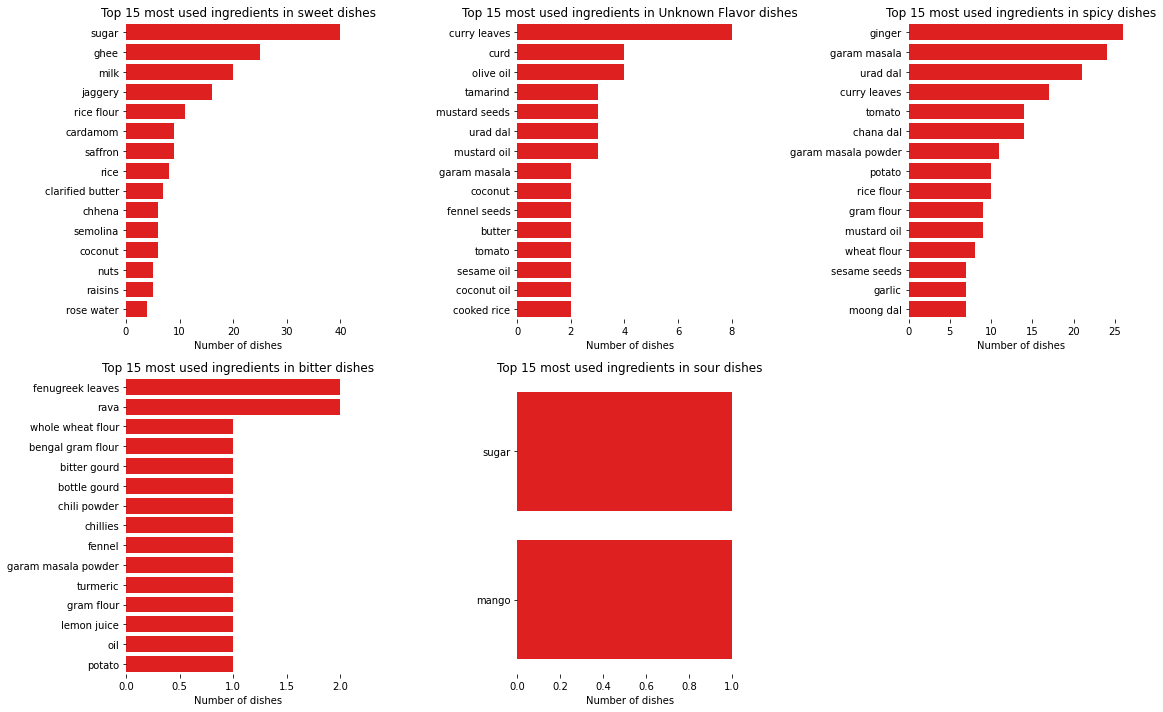

In [34]:
f_ing = []
flav_lst = list(set(data['flavor_profile']))
for f in flav_lst:
  flv_ing = create_ingredient_series(data[data['flavor_profile']==f]['ingredients'].tolist())
  f_ing.append(flv_ing)

fig = plt.figure(figsize=(16, 10))
for i in range(len(f_ing)):
  fig.add_subplot(2, 3, i+1)
  sns.barplot(y=f_ing[i].index[:15], x=f_ing[i].values[:15], color="red")
  sns.despine(left=True, bottom=True)
  plt.title("Top 15 most used ingredients in {} dishes".format(flav_lst[i]))
  plt.xlabel("Number of dishes")
fig.tight_layout()
plt.show()

#State Wise Distribution for Ingredients

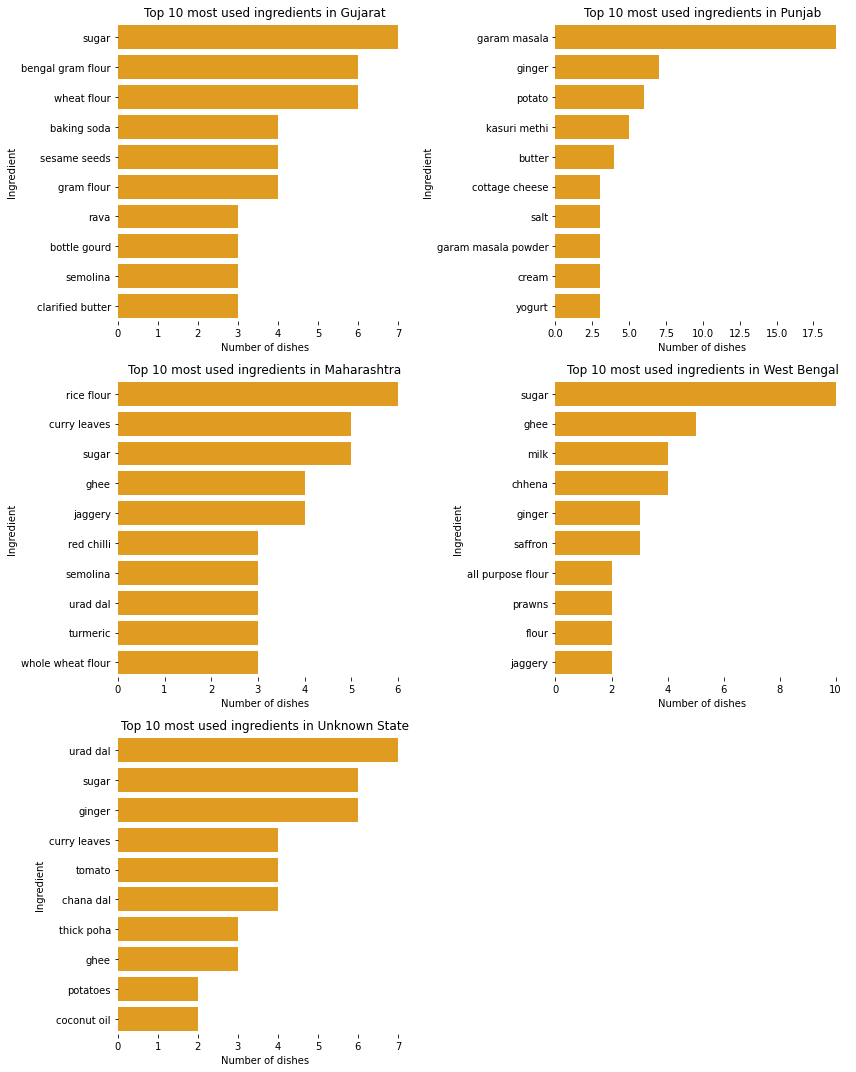

In [35]:
st_ing = []
st_lst = data['name'].groupby(data['state']).aggregate('count').sort_values(ascending=False).index[:5]
for f in st_lst:
  stat_ing = create_ingredient_series(data[data['state']==f]['ingredients'].tolist())
  st_ing.append(stat_ing)

fig = plt.figure(figsize=(12, 15))
for i in range(len(st_ing)):
  fig.add_subplot(3, 2, i+1)
  sns.barplot(y=st_ing[i].index[:10], x=st_ing[i].values[:10], color="orange")
  sns.despine(left=True, bottom=True)
  plt.title("Top 10 most used ingredients in {}".format(st_lst[i]))
  plt.xlabel("Number of dishes")
  plt.ylabel("Ingredient")
fig.tight_layout()
plt.show()